## Observations and Insights 

### Observations
From the scatter plot of weight vs average tumor volume, we can see that as weight increase, the average tumor volume increases as well. The correaltion ceoffecient value was 0.84, meaning that weight and average tumor volume are highly correlated.

For the mouse t565, we can see that as the study went on, the tumor volume drecreased to about 34 from 45. This mouse used the Capomulin treatment. (This might be the case for other mice treated with Capomulin).

From the boxplot we can see that for the treatments Ramicane and Infubinol, the data seems to be normally distributed. For the other two treatments it appears that 50% of the data is below the median value. For the Infubinol treatment there is only one outlier, while the other three treatments do not have any outliers.

From the summary statistics table we can see that Ramicane has the lowest mean and median values, suggesting that this treatment may be the most promising (40.22 and 40.67 respectivley). It also has the lowest standard error value 0.32. It is then closely followed by the Capomulin treatment.

This is almost an equal amount of male and female mice.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset, use outter in case there are mice only in one dataset and not the other
combined = pd.merge(mouse,study_results, on = "Mouse ID",how = "outer")

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of unique mice.
miceCount = len(combined["Mouse ID"].unique())
print(f"Number of unique mice in data frame is {miceCount}.")
# number of rows in dataframe
print(f"Number of rows in data frame is {combined.shape[0]}.")

Number of unique mice in data frame is 249.
Number of rows in data frame is 1893.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = combined.duplicated()
dup_mouseID = combined[dup_mouse].iloc[0,0]
dup_mouseID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined[combined["Mouse ID"] == dup_mouseID]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


Only remove the row that is duplicated (row 908 and 909)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = combined.drop_duplicates()

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse["Mouse ID"].unique())

249

There are the same number of unique mice, but there is ONE less row in the dataframe as we dropped the duplicate row ( see the number of rows below)

In [7]:
miceCount = len(clean_mouse["Mouse ID"].unique())
print(f"Number of unique mice in data frame is {miceCount}.")
# number of rows in dataframe
print(f"Number of rows in data frame is {clean_mouse.shape[0]}.")

Number of unique mice in data frame is 249.
Number of rows in data frame is 1892.


## Summary Statistics

### Find mean, median, variance, standard deviation and SEM of tumor volume variable for each regimen

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = clean_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

#create label names
names = ["Mean","Median","Var","Std","SEM"]

# calculate summary stats
mean = regimen.mean()
median = regimen.median()
std = regimen.std()
var = regimen.var()
sem = regimen.sem()

# Put into table
summary_stats = pd.DataFrame([mean, median,std,var,sem], index = names)

summary_stats = round(summary_stats.transpose(),2)
summary_stats

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,24.95,0.33
Ceftamin,52.59,51.78,6.27,39.29,0.47
Infubinol,52.88,51.82,6.57,43.13,0.49
Ketapril,55.24,53.70,8.28,68.55,0.60
Naftisol,54.33,52.51,8.13,66.17,0.60
Placebo,54.03,52.29,7.82,61.17,0.58
Propriva,52.37,50.91,6.50,42.28,0.51
Ramicane,40.22,40.67,4.85,23.49,0.32
Stelasyn,54.23,52.43,7.71,59.45,0.57


## Bar and Pie Charts

In [9]:
treatment = clean_mouse["Drug Regimen"].unique()
treatment = treatment.tolist()

In [10]:
# count how manny mice there were in each treatment at each timepoint
clean_mouse.groupby(["Drug Regimen","Timepoint"]).count()

Mouse ID  Sex  Age_months  Weight (g)  \
Drug Regimen Timepoint                                          
Capomulin    0                25   25          25          25   
             5                25   25          25          25   
             10               25   25          25          25   
             15               24   24          24          24   
             20               23   23          23          23   
...                          ...  ...         ...         ...   
Zoniferol    25               16   16          16          16   
             30               15   15          15          15   
             35               14   14          14          14   
             40               14   14          14          14   
             45               14   14          14          14   

                        Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen Timepoint                                        
Capomulin    0                          25                25  
             5                          25                25  
             10                         25                25  
             15                         24                24  
             20                         23                23  
...                                    ...               ...  
Zoniferol    25                         16                16  
             30                         15                15  
             35                         14                14  
             40                         14                14  
             45                         14                14  

[100 rows x 6 columns]

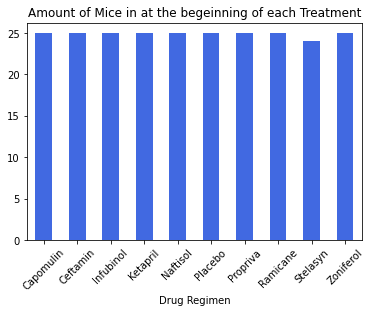

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
# group treatment and find counts for each treatment
freq = clean_mouse.groupby(["Drug Regimen"]).nunique()["Mouse ID"]
feq = pd.DataFrame(freq)
bar = freq.plot(kind= "bar",color= "royalblue",rot = 45, title= "Amount of Mice in at the begeinning of each Treatment")
bar.get_figure().savefig("../Images/pandas_bar",facecolor= "white",bbox_inches='tight')

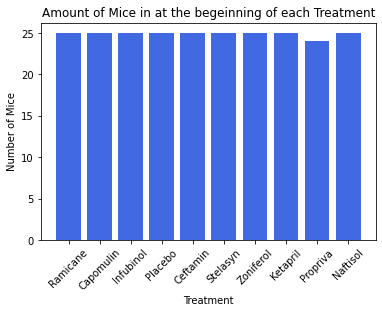

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(treatment,freq, color = "royalblue")
plt.xticks(rotation = 45)
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")
plt.title("Amount of Mice in at the begeinning of each Treatment")
plt.tight_layout
plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ("Male","Female")

# Find counts of unique mice for male and female
Sex_counts = clean_mouse.groupby(["Sex"]).nunique()["Mouse ID"]

# male count
male_count = Sex_counts.loc["Male"]

# female count
female_count = Sex_counts.loc["Female"]

# store values in a list
counts = [male_count,female_count]
counts_df = pd.DataFrame(counts)
counts_df= counts_df.rename(columns = {0: "counts"})
counts_df = counts_df.rename({0:"male", 1:"female"})

<Figure size 432x288 with 0 Axes>

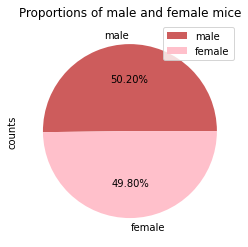

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
fig = plt.figure()
fig.patch.set_facecolor('white')
pie = counts_df.plot(kind = "pie", y = "counts",title = "Proportions of male and female mice",autopct = "%.2f%%",
                     colors = ("indianred","pink"))
pie.get_figure().savefig("../Images/pandas_pie",facecolor= "white")

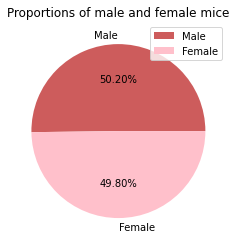

In [15]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(counts,autopct = "%.2f%%",labels=labels,colors = ("indianred","pink"))
plt.title("Proportions of male and female mice")
plt.legend()
plt.show()
fig.savefig("../Images/matplotlib_pie",facecolor= "white")

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# store the wanted treatments in a list
treatments_wanted = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# Find the ID's of each mice
mouse_ID = clean_mouse["Mouse ID"].unique()
clean_mouse["Timepoint"].value_counts()
# Start by getting the last (greatest) timepoint for each mouse
# for max timepoint for each mouse 
max_timepoints = clean_mouse.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse = clean_mouse.merge(max_timepoints, on = "Mouse ID", how = "outer", suffixes= ('_original', "_max"))

# if timepoint_original column and timepoint max columnsa re equal it returns the final tumor size
merged_mouse = merged_mouse[merged_mouse["Timepoint_original"]== merged_mouse["Timepoint_max"]]
final_tumor = merged_mouse[["Mouse ID","Tumor Volume (mm3)","Drug Regimen"]]

# Find the Tumor values for the four wanted treatments
final_tumor

,Mouse ID,Tumor Volume (mm3),Drug Regimen
9,k403,22.050126,Ramicane
19,s185,23.343598,Capomulin
29,x401,28.484033,Capomulin
39,m601,28.430964,Capomulin
49,g791,29.128472,Ramicane
...,...,...,...
1858,z314,45.934712,Stelasyn
1861,z435,48.710661,Propriva
1871,z581,62.754451,Infubinol
1881,z795,65.741070,Naftisol


In [17]:
treatments = treatments_wanted

# Create empty list to fill with tumor vol data (for plotting)
tumor_values =[]

# fill list with tumor vol data
final_tumor_vol = final_tumor.set_index("Drug Regimen")
for i in range(len(treatments)):
    result = final_tumor_vol.loc[treatments[i]]["Tumor Volume (mm3)"]
    tumor_values.append(result)

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# set indexes as drug regimen to easily find mice with that drug regimen
ft = final_tumor.set_index("Drug Regimen")

# calculate q1, q3 and iqr for each treatment
# store q1 values here
q1_list = []

# store q3 values here
q3_list = [] 

# store iqr values here
iqr_list = []

# store lower bounds here
lower_list = []

# store upper bounds here
upper_list = []

outliers = []
# calculate q1,q3 and iqr and store in respective lists
for treatment in treatments:
    # find q1 for treatment
    q1 = ft.loc[treatments].loc[treatment]["Tumor Volume (mm3)"].quantile(0.25)
    
    # store in q1 list
    q1_list.append(q1)
    
    # find q3
    q3 = ft.loc[treatments].loc[treatment]["Tumor Volume (mm3)"].quantile(0.75)
    
    # store in q3 list
    q3_list.append(q3)
    
    # find iqr
    iqr = q3-q1
    
    # store in iqr list
    iqr_list.append(iqr)

    # find lower and upper bounds
    lower_bound = q1 - 1.5*iqr
    lower_list.append(lower_bound)
    
    upper_bound = q3 + 1.5* iqr
    upper_list.append(upper_bound) 
    
    # Determine outliers using upper and lower bounds
    lower_count = ft.loc[treatment][ft.loc[treatment]["Tumor Volume (mm3)"] < lower_bound].count()
    upper_count = ft.loc[treatment][ft.loc[treatment]["Tumor Volume (mm3)"] > upper_bound].count()
    print(f"There is {upper_count[0]+lower_count[0]} outlier(s) for treatment {treatment}")

# Found outlier in Infubinol treatment
print(f"\nHere are the mice that have a tumor volume below the lower bound:")
print(ft.loc["Infubinol"][ft.loc["Infubinol"]["Tumor Volume (mm3)"] < lower_list[2]])

print(f"\n\nHere are the mice that have a tumor volume below the lower bound:")
print(ft.loc["Infubinol"][ft.loc["Infubinol"]["Tumor Volume (mm3)"] > upper_bound])
print(f"\nThis data frame is empty")

There is 0 outlier(s) for treatment Capomulin
There is 0 outlier(s) for treatment Ramicane
There is 1 outlier(s) for treatment Infubinol
There is 0 outlier(s) for treatment Ceftamin

Here are the mice that have a tumor volume below the lower bound:
             Mouse ID  Tumor Volume (mm3)
Drug Regimen                             
Infubinol        c326           36.321346


Here are the mice that have a tumor volume below the lower bound:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []

This data frame is empty


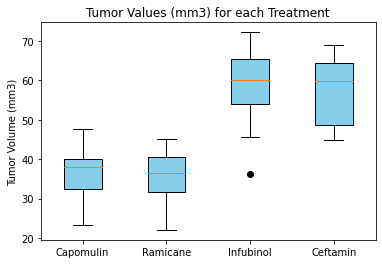

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.boxplot(tumor_values, patch_artist = True,boxprops=dict(facecolor='skyblue'),flierprops = dict(markerfacecolor = "black"))
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Values (mm3) for each Treatment")
plt.xticks([1,2,3,4],["Capomulin", "Ramicane", "Infubinol","Ceftamin"])
plt.show()


## Line and Scatter Plots

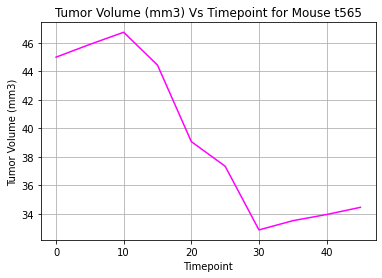

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
155,t565,Capomulin,Female,20,17,0,45.000000,0
156,t565,Capomulin,Female,20,17,5,45.895647,0
157,t565,Capomulin,Female,20,17,10,46.749006,0
158,t565,Capomulin,Female,20,17,15,44.440949,0
159,t565,Capomulin,Female,20,17,20,39.070214,0
160,t565,Capomulin,Female,20,17,25,37.342210,0
161,t565,Capomulin,Female,20,17,30,32.868916,0
162,t565,Capomulin,Female,20,17,35,33.515671,0
163,t565,Capomulin,Female,20,17,40,33.949341,0
164,t565,Capomulin,Female,20,17,45,34.455298,0


In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# select a mouse from Capomulin treatment
capomulin_mice = clean_mouse[clean_mouse["Drug Regimen"] == "Capomulin"]

# select random mouse, random_state makes sure the same mouse is always chose from the sample 
# (to make testing the code easier)
single_mouse = capomulin_mice.sample(random_state = 1)
single_mouse = single_mouse.iloc[0,0]

# get all rows about mouse with this id
chosen_mouse = clean_mouse[clean_mouse["Mouse ID"] == single_mouse]
chosen_mouse

# timepoint will be x axis
x_axis = chosen_mouse["Timepoint"]

# tumor volume will be y axis
y_axis = chosen_mouse["Tumor Volume (mm3)"]

# plot line graph, with labels, title and grid
plt.plot(x_axis,y_axis, color= "magenta")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) Vs Timepoint for Mouse t565")
plt.grid()
plt.show()
chosen_mouse

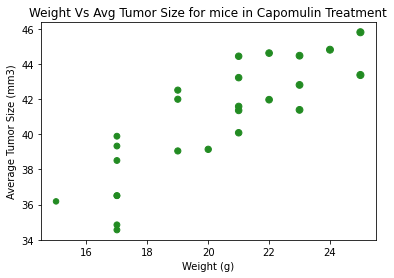

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = clean_mouse[clean_mouse["Drug Regimen"] == "Capomulin"]
mean_capomulin = capomulin.groupby(["Mouse ID","Drug Regimen"]).mean()
weight =mean_capomulin ["Weight (g)"]
average_tumor = mean_capomulin["Tumor Volume (mm3)"]
plt.scatter(weight,average_tumor, s= weight*2, color = "forestgreen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.title("Weight Vs Avg Tumor Size for mice in Capomulin Treatment")
plt.show()

## Correlation and Regression

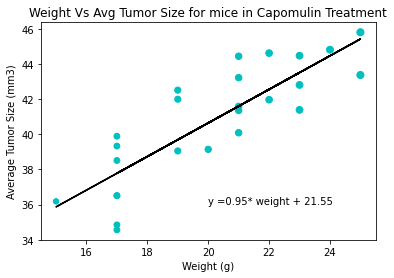

The correlation coefficient is 0.84.


In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# linear regression
slope, intercept, r, p, std_err = st.linregress(weight, average_tumor) 

# regression model
avg_tumor = slope*weight + intercept

# line equation
line = "y ="+str(round(slope,2))+"* weight + "+ str(round(intercept,2))
plt.scatter(weight,average_tumor, s= weight*2, color = "c")
plt.plot(weight,avg_tumor, color ="black")
plt.annotate(line,(20,36))
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.title("Weight Vs Avg Tumor Size for mice in Capomulin Treatment")
plt.show()


print(f"The correlation coefficient is {round(r,2)}.")